## Things to have in mind when doing EDA:

 1. Discovering and checking the overall shape, size, content. 
 
 2. Are any Join needed? 
 
 3. Validation, cleaning.
 
 4. Structuring, understand trends, validate.
 
 5. **Clean, validate as you go.**
 
 6. Efective data visuals.
 
 7. Descreptive Statistics. 
 
     7.1 Measure of central tendency.
     
     7.2 Measures of dispersion.
     
     7.3 Measures of position.
     
     7.4 Hypothesis testing t-test&pValue. 
     
 8. Check multiple linear regression assumptions or simple linear regression assumptions. 

    8.1. Linearity: Each predictor variable (Xi) is linearly related to the outcome variable (Y).

    8.2. Normality: The errors are normally distributed.*

    8.3. Independent Observations: Each observation in the dataset is independent.

    8.4. Homoscedasticity: The variance of the errors is constant or similar across the model.*

    8.5. The Data can not be multicollinear.

In [1]:
import exploratory_data_analysis.eda_functions as eda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings as cuidado
cuidado.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.columns = df.columns.str.lower().str.strip('')
info = pd.read_csv('columans.csv', index_col=False)
pd.set_option('display.max_colwidth', None)

In [3]:
df.head()

rownumber  customerid   surname  creditscore geography  gender  age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   tenure    balance  numofproducts  hascrcard  isactivemember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   estimatedsalary  exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
## dividing data by data type

nums = eda.sift_data_type(df)['nums']
objs = eda.sift_data_type(df)['objs']

In [6]:
## estimates of central tendency, location and disperssion.
df.describe()

rownumber    customerid   creditscore           age        tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             balance  numofproducts    hascrcard  isactivemember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       estimatedsalary        exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [7]:
## missing or invalid values
eda.get_invalid_values(df[objs])

nulls  invalids  \
surname        0         0   
geography      0         0   
gender         0         0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     unique_item  
surname    [Hargrave, Hill, Onio, Boni, Mitchell, Chu, Bartlett, Obinna, He, H?, Bearce, Andrews, Kay, Chin, Scott, Goforth, Romeo, Henderson, Muldrow, Hao, McDonald, Dellucci, Gerasimov, Mosman, Yen, Maclean, Young, Nebechi, McWilliams, Lucciano, Azikiwe, Odinakachukwu, Sanderson, Maggard, Clements, Lombardo, Watson, Lorenzo, Armstrong, Cameron, Hsiao, Clarke, Osborne, Lavine, Bianchi, Tyler, Martin, Okagbue, Yin, Buccho, Chidiebele, Trevisani, O'Brien, Parkhill, Yoo, Phillipps, Tsao, Endrizzi, T'ien, Velazquez, Hunter, Clark, Jeffrey, Pirozzi, Jackson, Hammond, Brownless, Chibugo, Glauert, Pisano, Konovalova, McKee, Palermo, Ballard, Wallace, Cavenagh, Hu, Read, Bushell, Postle, Buley, Leonard, Mills, Onyeorulu, Beit, Ndukaku, Gant, Rowley, Sharpe, Heap, Ritchie, Cole, Capon, Fiorentini, Graham, Yuille, Allard, Fanucci, Fu, Hung, ...]  
geography                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               [France, Spain, Germany]  
gender                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            [Female, Male]

In [8]:
## missing or invalid values
eda.get_invalid_values(df[nums])

nulls  invalids  \
rownumber            0         0   
customerid           0         0   
creditscore          0         0   
age                  0         0   
tenure               0         0   
balance              0         0   
numofproducts        0         0   
hascrcard            0         0   
isactivemember       0         0   
estimatedsalary      0         0   
exited               0         0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           unique_item  
rownumber                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]  
customerid                                                               [15634602, 15647311, 15619304, 15701354, 15737888, 15574012, 15592531, 15656148, 15792365, 15592389, 15767821, 15737173, 15632264, 15691483, 15600882, 15643966, 15737452, 15788218, 15661507, 15568982, 15577657, 15597945, 15699309, 15725737, 15625047, 15738191, 15736816, 15700772, 15728693, 15656300, 15589475, 15706552, 15750181, 15659428, 15732963, 15794171, 15788448, 15729599, 15717426, 15585768, 15619360, 15738148, 15687946, 15755196, 15684171, 15754849, 15602280, 15771573, 15766205, 15771873, 15616550, 15768193, 15683553, 15702298, 15569590, 15760861, 15630053, 15647091, 15623944, 15804771, 15651280, 15773469, 15702014, 15751208, 15592461, 15789484, 15696061, 15641582, 15638424, 15755648, 15703793, 15620344, 15812518, 15779052, 15770811, 15780961, 15614049, 15662085, 15575185, 15803136, 15706021, 15663706, 15641732, 15701164, 15738751, 15805254, 15762418, 15625759, 15622897, 15767954, 15757535, 15731511, 15809248, 15640635, 15676966, 15699461, 15738721, 15693683, 15604348, 15633059, ...]  
creditscore                                                                                                                                                                                                                                                                                                                                          

In [9]:
## displaying the columns metadata
info

Column TypeDescription  \
0         RowNumber             int   
1        CustomerId             int   
2           Surname             str   
3       CreditScore             int   
4         Geography             str   
5           Gender*             str   
6               Age             int   
7            Tenure             int   
8           Balance           float   
9     NumOfProducts             int   
10        HasCrCard            bool   
11   IsActiveMember            bool   
12  EstimatedSalary           float   
13           Exited            bool   

                                                                name  
0                                           Row numbers from 1 to 10  
1                              Customer’s unique ID assigned by bank  
2                                               Customer’s last name  
3   Customer’s credit score. This number can range from 300 to 850.   
4                                    Customer’s country of residence  
5                                              Categorical indicator  
6                                             Customer’s age (years)  
7                        Number of years customer has been with bank  
8                                   Customer’s bank balance (Euros)   
9                  Number of products the customer has with the bank  
10    Indicates whether the customer has a credit card with the bank  
11               Indicates whether the customer is considered active  
12                        Customer’s estimated annual salary (Euros)  
13            Indicates whether the customer churned (left the bank)

*Many societies now understand that gender is not binary and there is fluidity in the category across people and time, so creating categories that allow for that leads to more accurate data collection processes.

In [10]:
## columns by data type finner grain.
nums = ['creditscore', 'balance', 'age', 'estimatedsalary']
cats = ['geography', 'tenure', 'numofproducts', 'hascrcard',
       'isactivemember']
target = ['exited']

In [11]:
## Is there duplicated data?
not_duplicates = df.shape == df.drop_duplicates().shape
if not_duplicates == True:
    print('No Duplicates.')
else: print('Duplicated data.')

No Duplicates.


In [12]:
## not descriptive features
df.drop(['rownumber', 'customerid', 'surname', 'gender'], axis=1, inplace=True)

In [13]:
## 1 means they are no customers
## 0 menas they are still customers.
df.head()

creditscore geography  age  tenure    balance  numofproducts  hascrcard  \
0          619    France   42       2       0.00              1          1   
1          608     Spain   41       1   83807.86              1          0   
2          502    France   42       8  159660.80              3          1   
3          699    France   39       1       0.00              2          0   
4          850     Spain   43       2  125510.82              1          1   

   isactivemember  estimatedsalary  exited  
0               1        101348.88       1  
1               1        112542.58       0  
2               0        113931.57       1  
3               0         93826.63       0  
4               1         79084.10       0

In [14]:
## 
df['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

# Observing the previously grouped data

**1. numerical data, distributions, outliers, ranges, empirical rule, posible tansformations.**

**2. categorical data, dist, balance or not, adjustments, transformations?**

**3. target, the target, is it balance?**

---
**1. Numerical data, distributions, outliers, ranges, empirical rule, posible tansformations.**


In [15]:
## numerical data, nums
nums

['creditscore', 'balance', 'age', 'estimatedsalary']

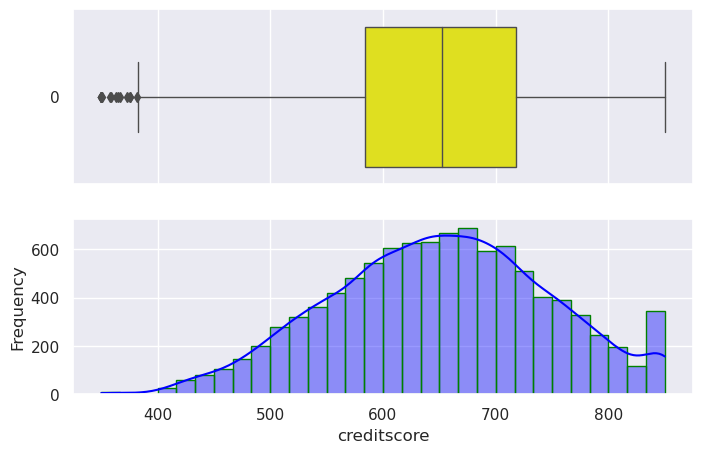

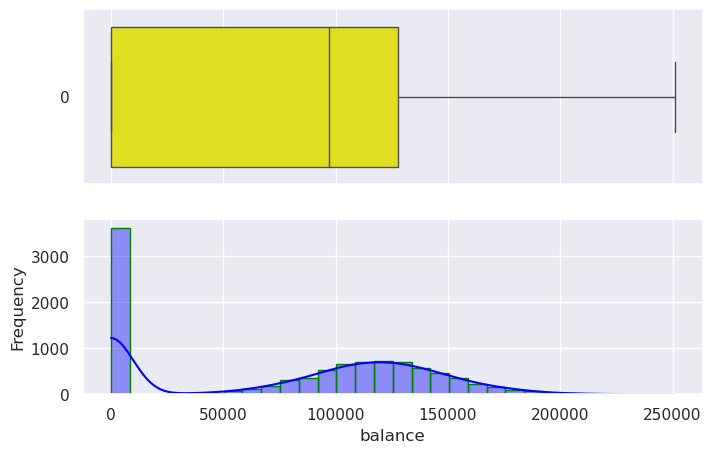

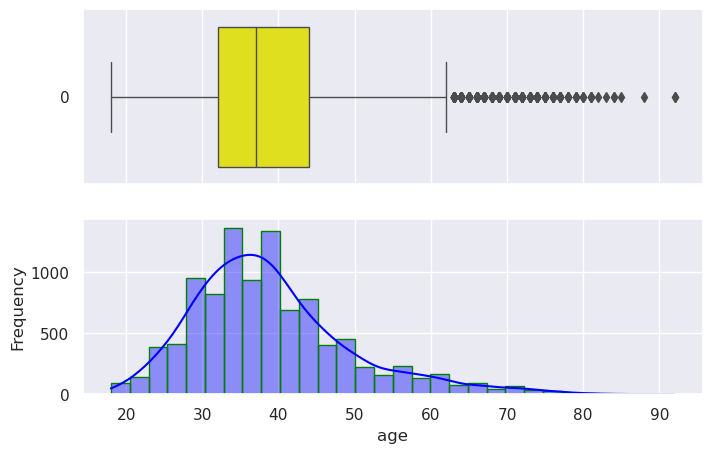

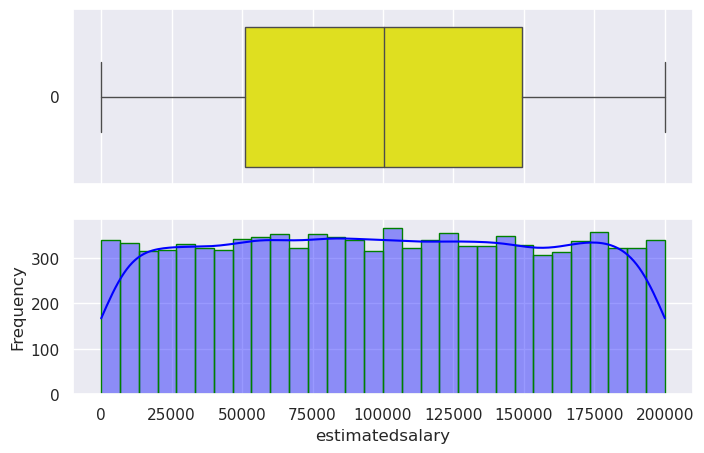

In [16]:
## Observing Distribution of the continious variables nums.
##

for i in df[nums]:
    sns.set(rc={"figure.figsize":(8, 5)});
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency');

    sns.boxplot(df[i], orient='h', ax=ax_box , linewidth= 1.0, color='yellow');
    sns.histplot(df[i], ax=ax_hist , bins = 30, kde=True, color='blue', edgecolor='green', alpha=0.4);

### comparing distributions with empirical rule and qq plot

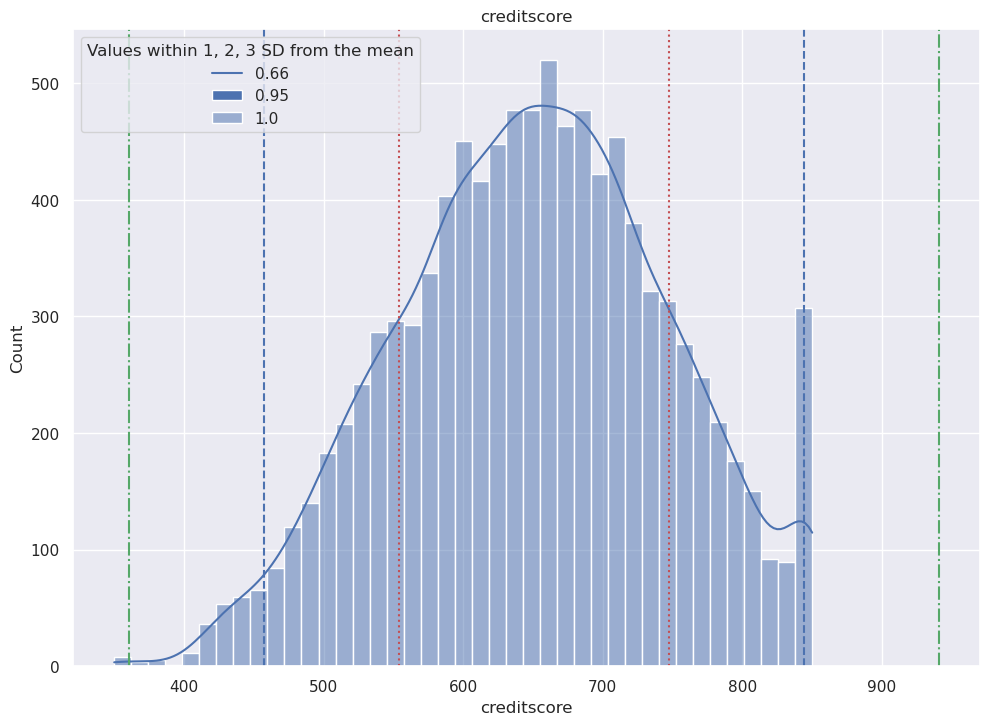

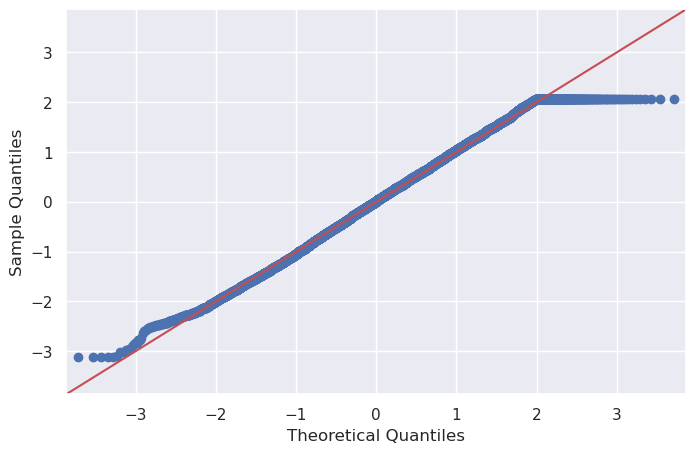

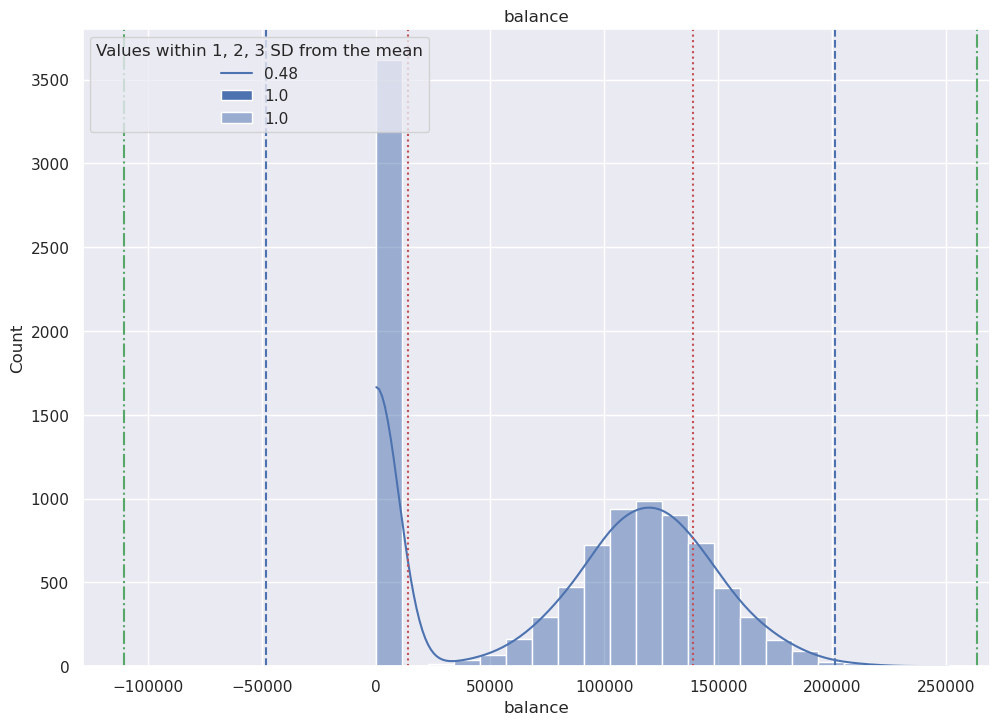

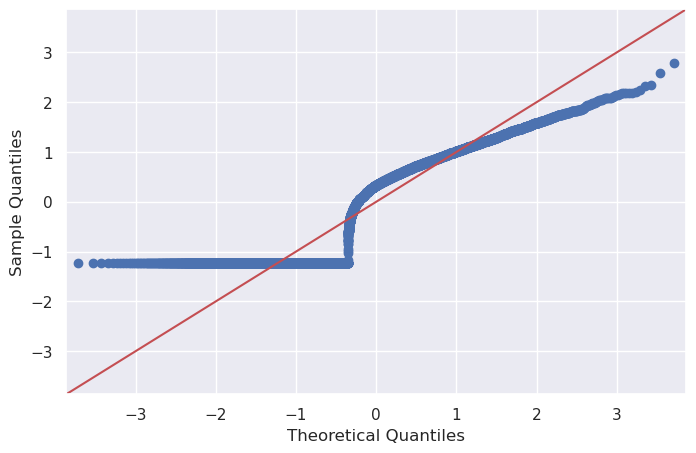

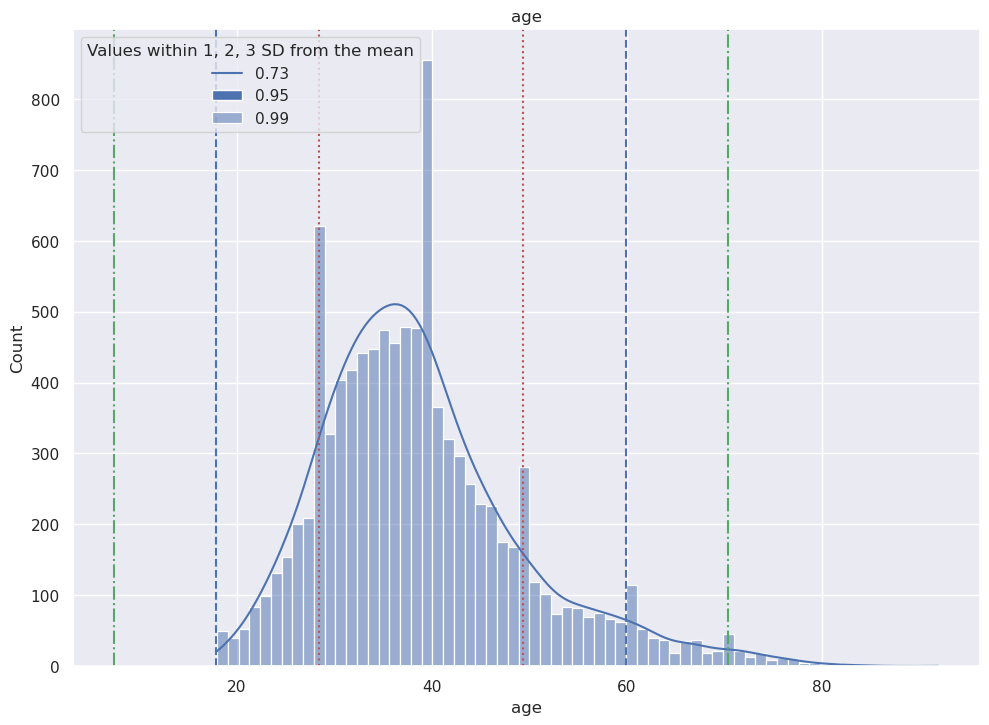

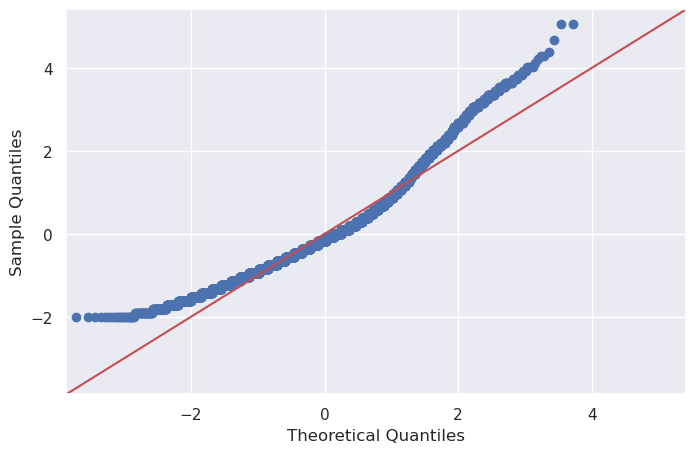

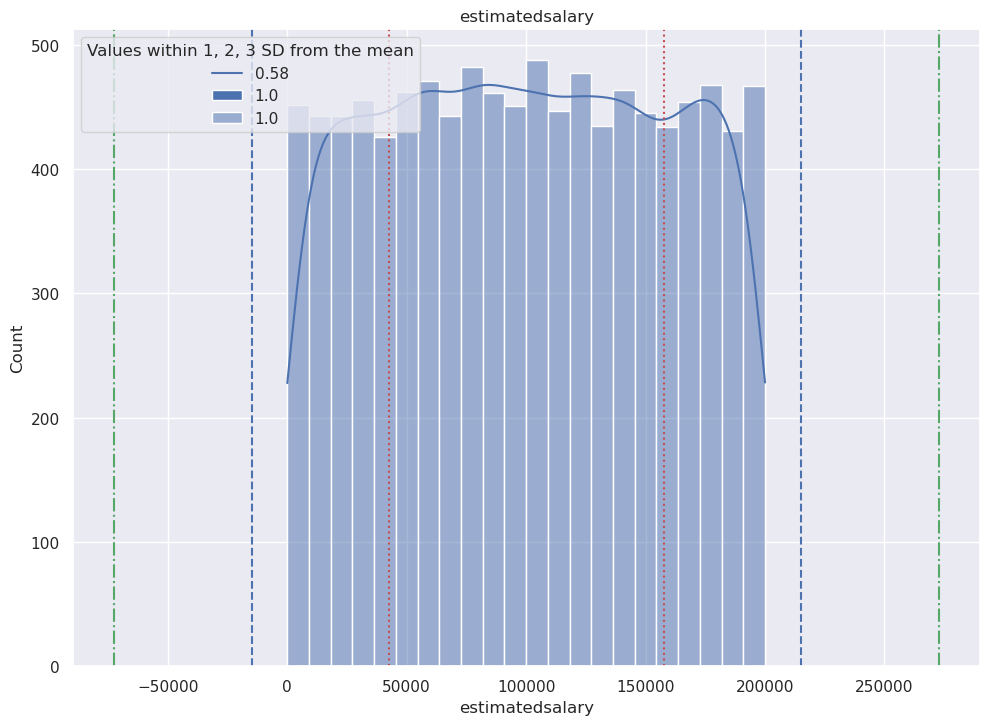

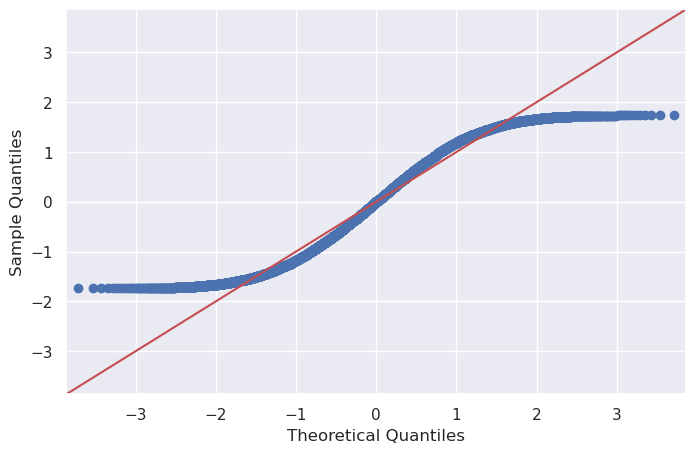

In [17]:
for j in nums: eda.distribution(df, j)

In [18]:
nums

['creditscore', 'balance', 'age', 'estimatedsalary']

In [19]:
## 
eda.empirical(df, 'creditscore')

creditscore  \
Frac of the values within +/- 1 SD from the mean         0.66   
Frac of the values within +/- 2 SD from the mean         0.95   
Frac of the values within +/- 3 SD from the mean         1.00   

                                                  empirical_rule_suggest  \
Frac of the values within +/- 1 SD from the mean                   0.680   
Frac of the values within +/- 2 SD from the mean                   0.950   
Frac of the values within +/- 3 SD from the mean                   0.997   

                                                  difference  
Frac of the values within +/- 1 SD from the mean       0.020  
Frac of the values within +/- 2 SD from the mean       0.000  
Frac of the values within +/- 3 SD from the mean       0.003

In [20]:
##
eda.empirical(df, 'balance')

balance  \
Frac of the values within +/- 1 SD from the mean     0.48   
Frac of the values within +/- 2 SD from the mean     1.00   
Frac of the values within +/- 3 SD from the mean     1.00   

                                                  empirical_rule_suggest  \
Frac of the values within +/- 1 SD from the mean                   0.680   
Frac of the values within +/- 2 SD from the mean                   0.950   
Frac of the values within +/- 3 SD from the mean                   0.997   

                                                  difference  
Frac of the values within +/- 1 SD from the mean       0.200  
Frac of the values within +/- 2 SD from the mean       0.050  
Frac of the values within +/- 3 SD from the mean       0.003

In [21]:
##
eda.empirical(df, 'estimatedsalary')

estimatedsalary  \
Frac of the values within +/- 1 SD from the mean             0.58   
Frac of the values within +/- 2 SD from the mean             1.00   
Frac of the values within +/- 3 SD from the mean             1.00   

                                                  empirical_rule_suggest  \
Frac of the values within +/- 1 SD from the mean                   0.680   
Frac of the values within +/- 2 SD from the mean                   0.950   
Frac of the values within +/- 3 SD from the mean                   0.997   

                                                  difference  
Frac of the values within +/- 1 SD from the mean       0.100  
Frac of the values within +/- 2 SD from the mean       0.050  
Frac of the values within +/- 3 SD from the mean       0.003

In [22]:
##
eda.empirical(df, 'age')

age  \
Frac of the values within +/- 1 SD from the mean  0.73   
Frac of the values within +/- 2 SD from the mean  0.95   
Frac of the values within +/- 3 SD from the mean  0.99   

                                                  empirical_rule_suggest  \
Frac of the values within +/- 1 SD from the mean                   0.680   
Frac of the values within +/- 2 SD from the mean                   0.950   
Frac of the values within +/- 3 SD from the mean                   0.997   

                                                  difference  
Frac of the values within +/- 1 SD from the mean       0.050  
Frac of the values within +/- 2 SD from the mean       0.000  
Frac of the values within +/- 3 SD from the mean       0.007

In [23]:
##
## 

#### Notes:
---

Lets use Tukey method to catch the outliers.

`balance` seems to have a group of outliers, but are the people that has balance equal to 0.

The `balance` in Germany is always over zero, `min  27288.43` some monetary value.

`creditscore` has 15 outliers at 1.5 threshold.

`age`, as follow

The score threshold is: 1.5
Number of outliers is: 359

The score threshold is: 2.0
Number of outliers is: 173

The score threshold is: 2.5
Number of outliers is: 54

The score threshold is: 3.0
Number of outliers is: 12

The score threshold is: 3.5
Number of outliers is: 3







In [24]:
## Identifying and counting the number of outliers
## both directions.
for i in nums:
    q25 = df[i].quantile(0.25)
    q75 = df[i].quantile(0.75)
    iqr = q75 - q25
    print('-------------------------------')
    print(f'------- {i} ----------')
    for threshold in np.arange(1,5,0.5):
        
        min_val = q25 - (iqr*threshold)
        max_val = q75 + (iqr*threshold)

        outl = len((np.where((df[i] > max_val)
                          | (df[i] < min_val))[0]))

        print(f'The score threshold is: {threshold}')
        print(f'Number of outliers is: {outl}')
        

-------------------------------
------- creditscore ----------
The score threshold is: 1.0
Number of outliers is: 185
The score threshold is: 1.5
Number of outliers is: 15
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0
-------------------------------
------- balance ----------
The score threshold is: 1.0
Number of outliers is: 0
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0
---------------------------

In [25]:
## Balance is almost two groups, balance_zero + normal distributed data over 0.
## I wonder if we can do that.
posOut = df[df['balance'] == 0 ] 
posIn  = df[df['balance'] != 0 ] 

In [26]:
## No Germany
posOut['geography'].unique()

array(['France', 'Spain'], dtype=object)

In [27]:
## All Zones are present.
posIn['geography'].unique()

array(['Spain', 'France', 'Germany'], dtype=object)

In [28]:
df[df['geography'] == 'Germany']['balance'].describe()

count      2509.000000
mean     119730.116134
std       27022.006157
min       27288.430000
25%      102800.720000
50%      119703.100000
75%      137560.380000
max      214346.960000
Name: balance, dtype: float64

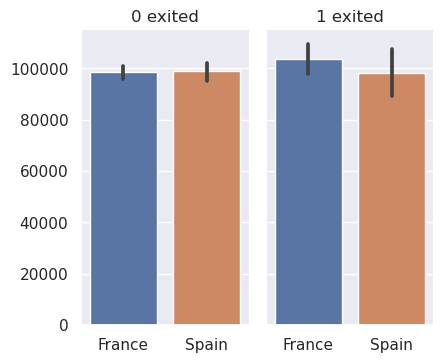

In [29]:
## observing the target
## related to the group of people that has balance 0
## and happens that there is no Germany here.
g = sns.catplot(
    data=posOut, x='geography', y='estimatedsalary', col='exited',
    kind='bar', height=4, aspect=.6,
)

g.set_axis_labels('', '')
g.set_xticklabels(posOut['geography'].unique())
g.set_titles('{col_name} {col_var}')
g.set()
g.despine(left=True);


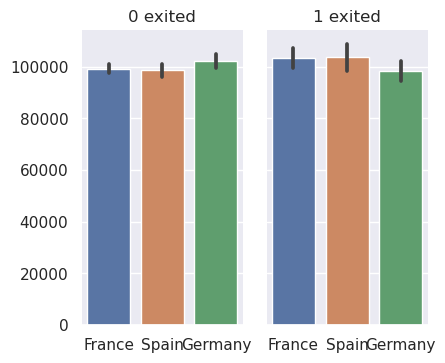

In [30]:
## Here observing the group that the balance is grater than
## zero related to the target.

g = sns.catplot(
    data=df, x='geography', y='estimatedsalary', col='exited',
    kind='bar', height=4, aspect=.6,
)
g.set_axis_labels('', '')
g.set_xticklabels(df['geography'].unique())
g.set_titles('{col_name} {col_var}')
g.set()
g.despine(left=True);

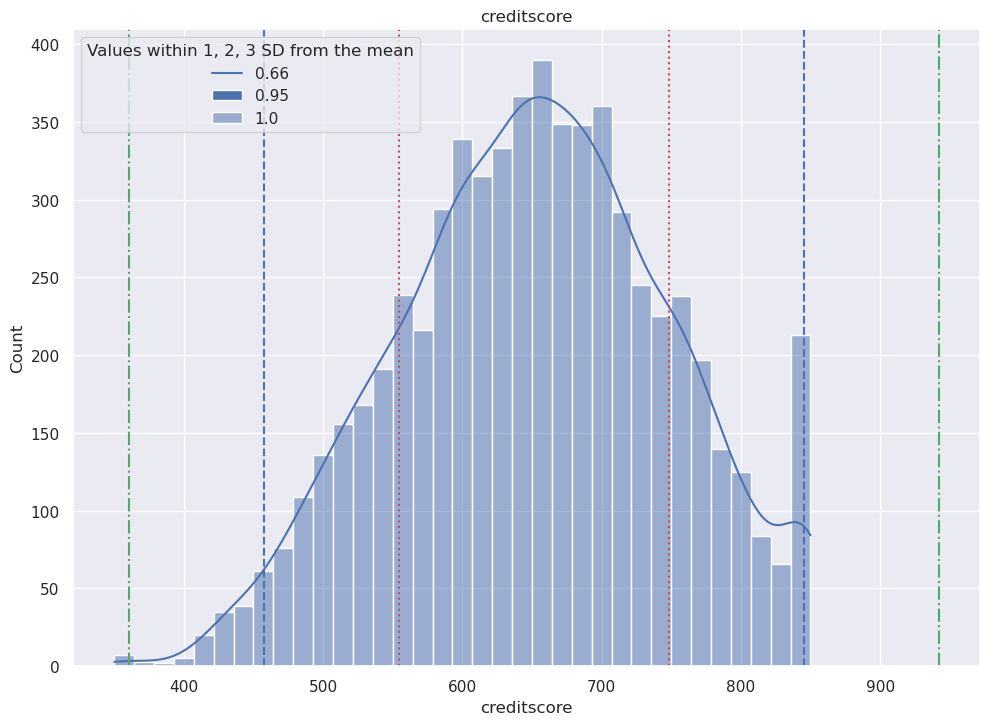

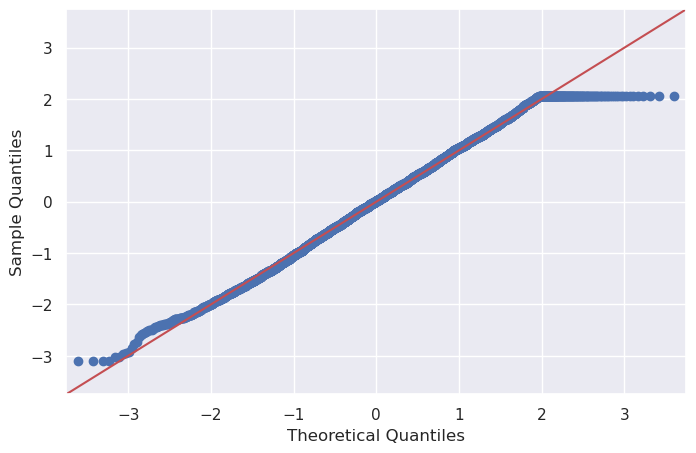

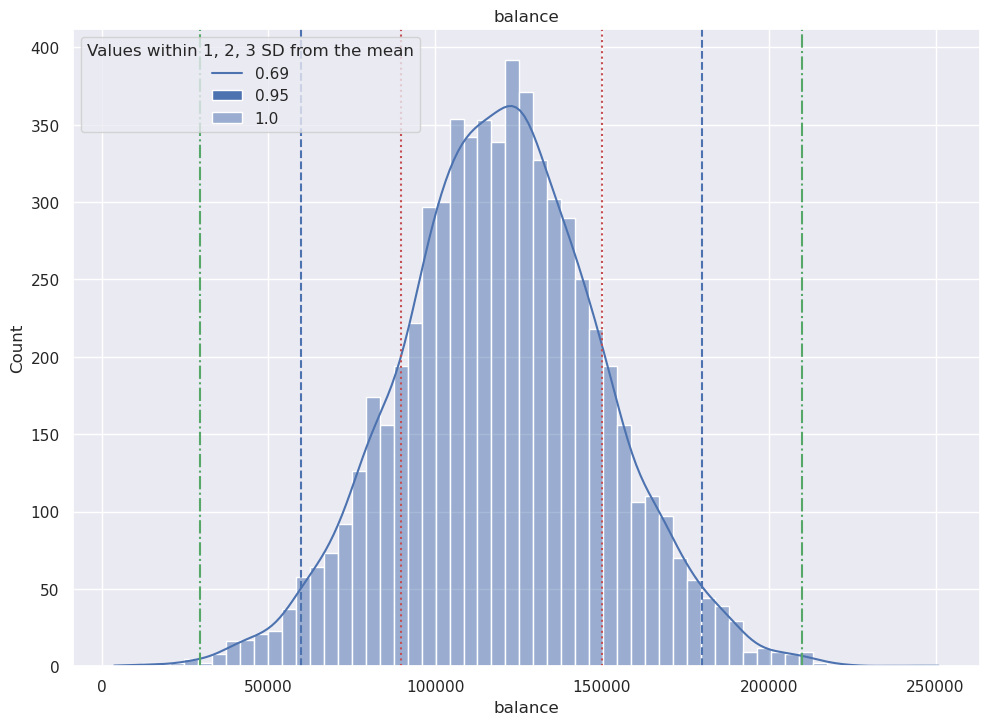

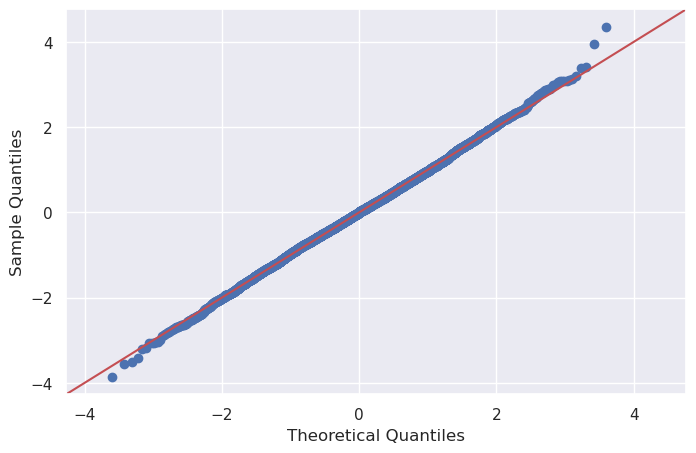

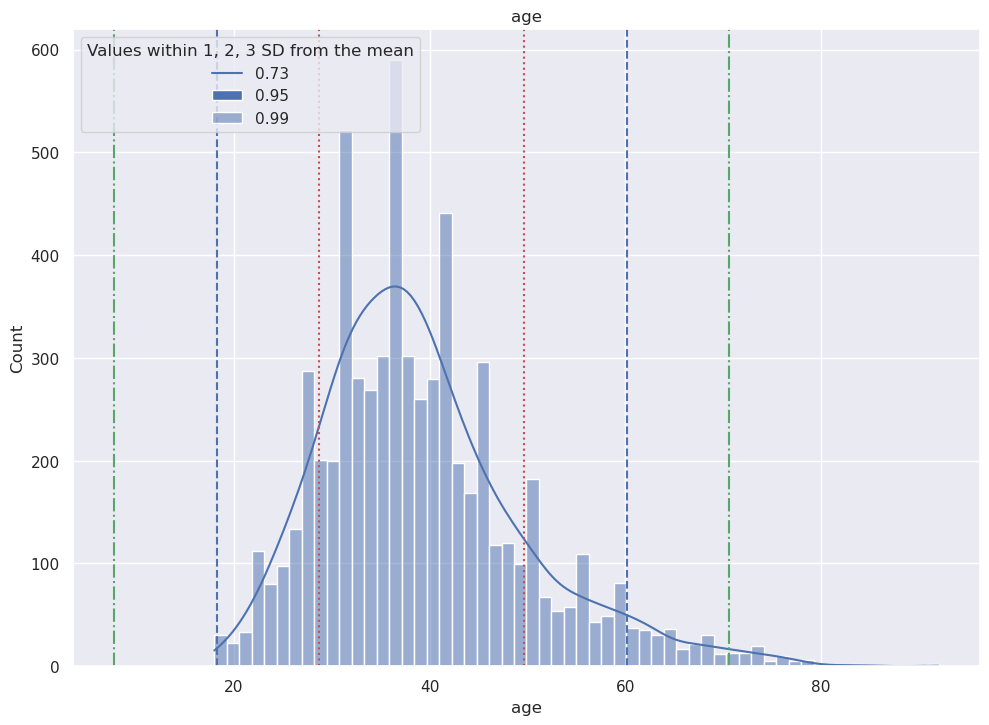

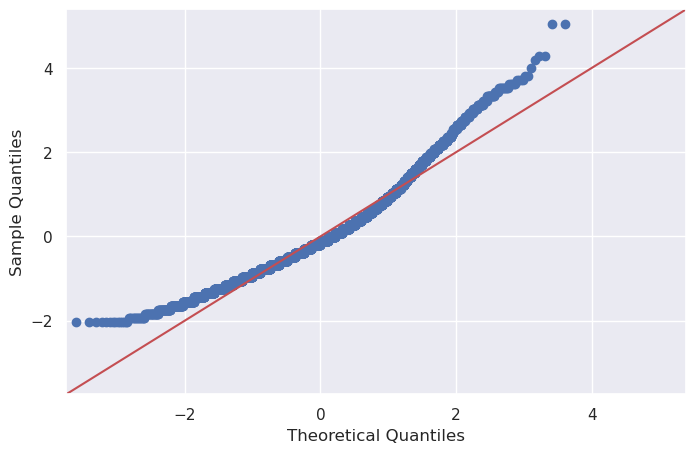

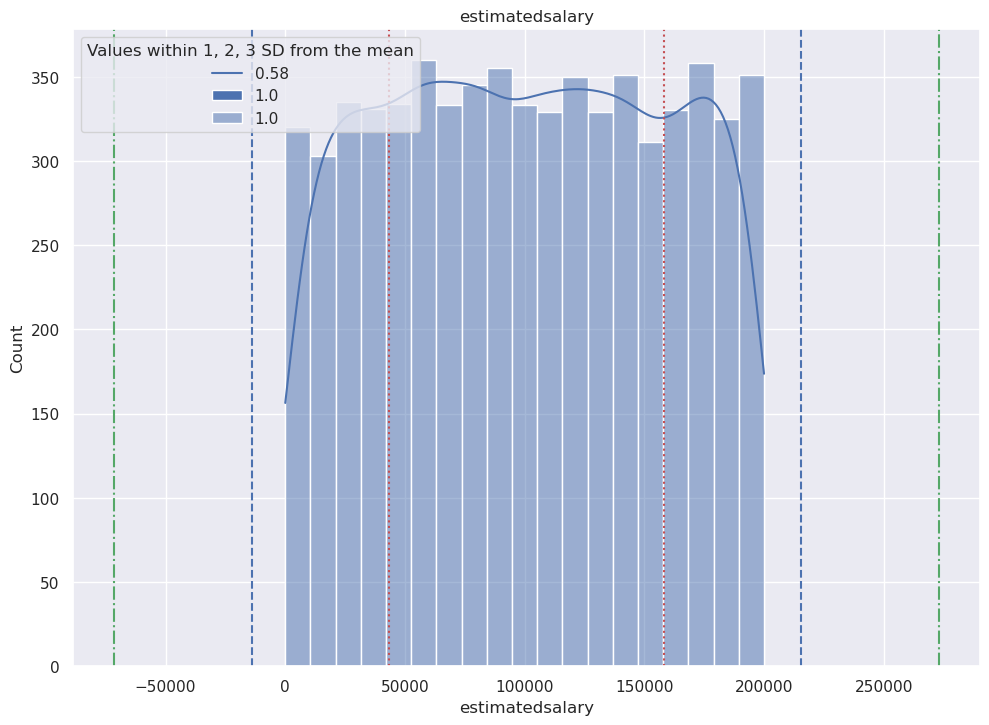

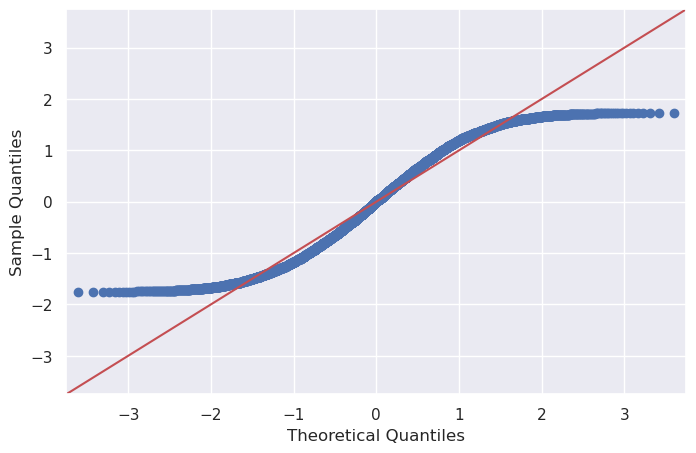

In [31]:
## Distributions of the group that the balance is greater than zero.
for j in nums: eda.distribution(posIn, j)

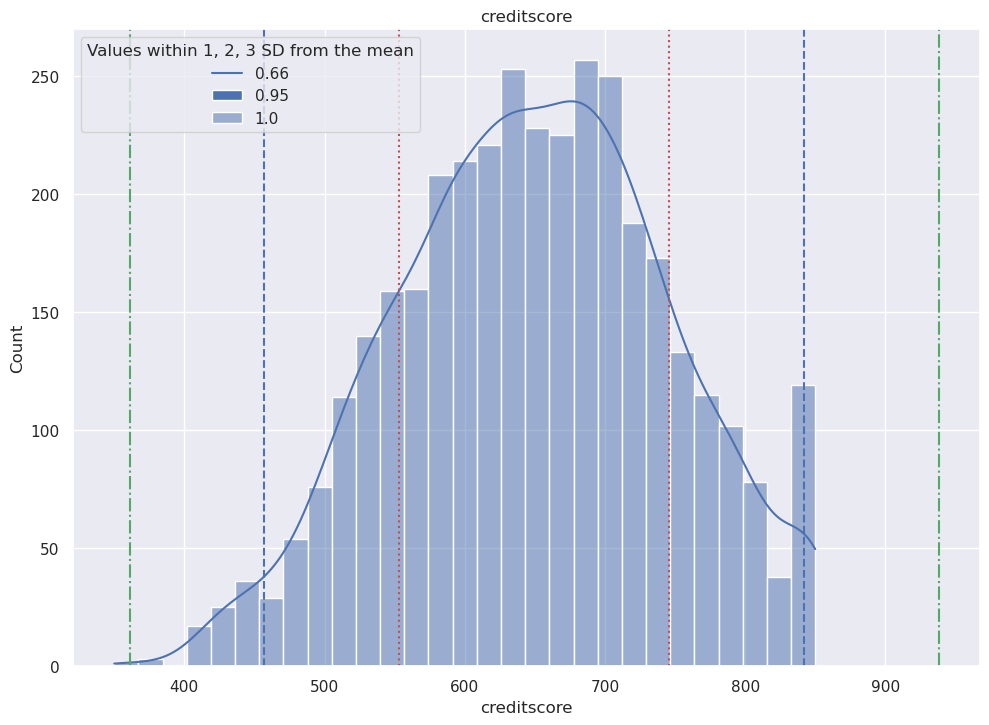

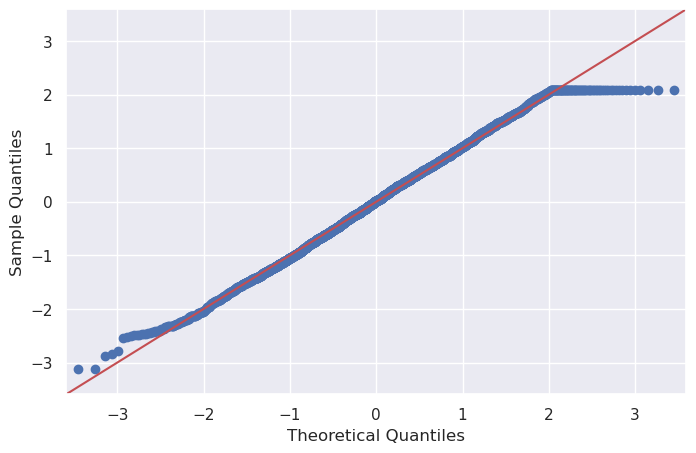

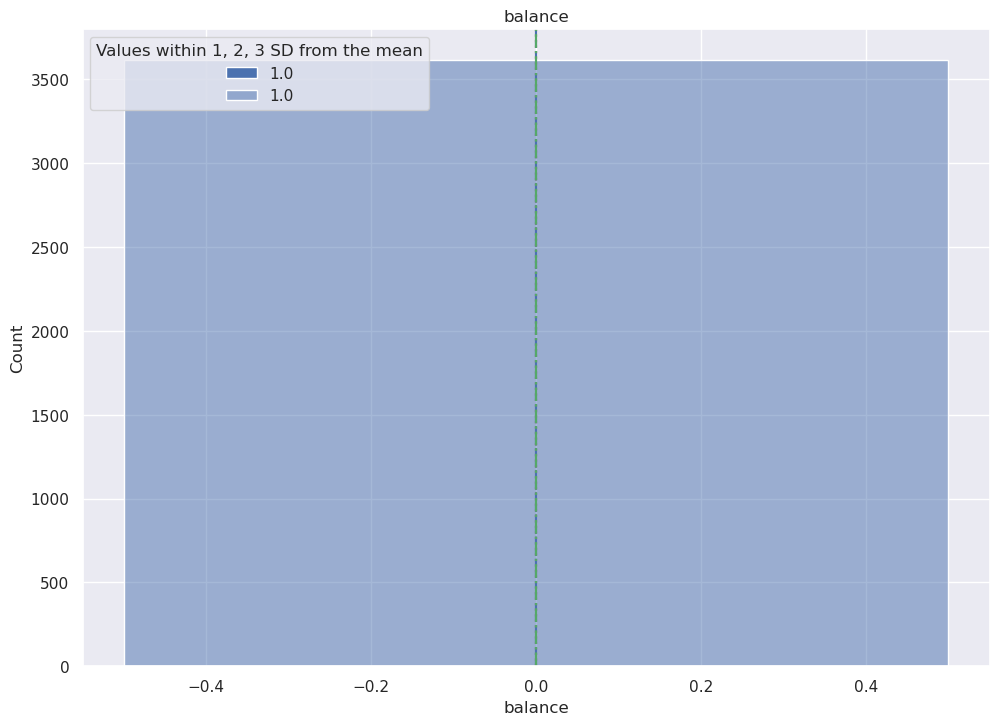

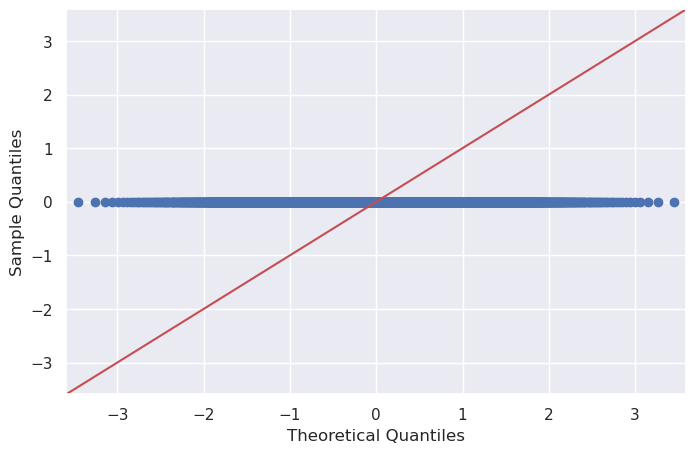

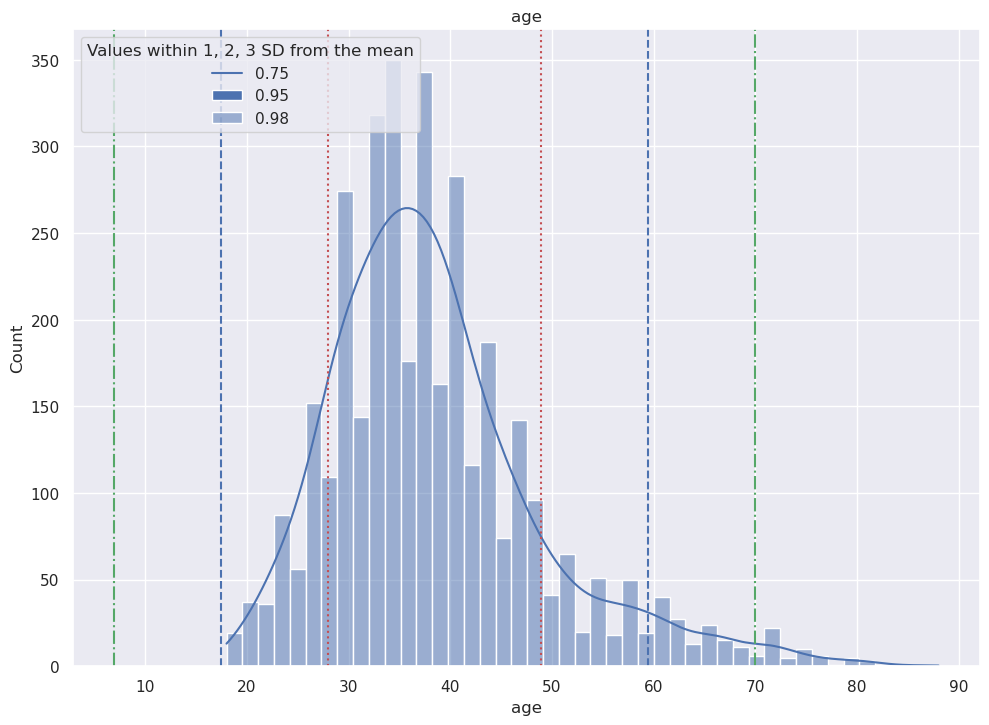

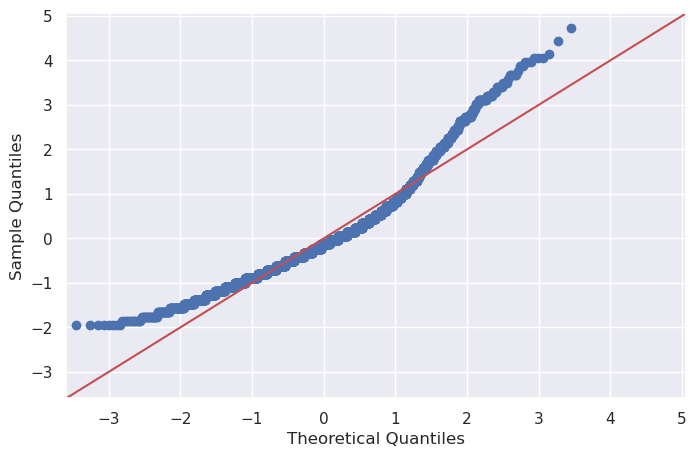

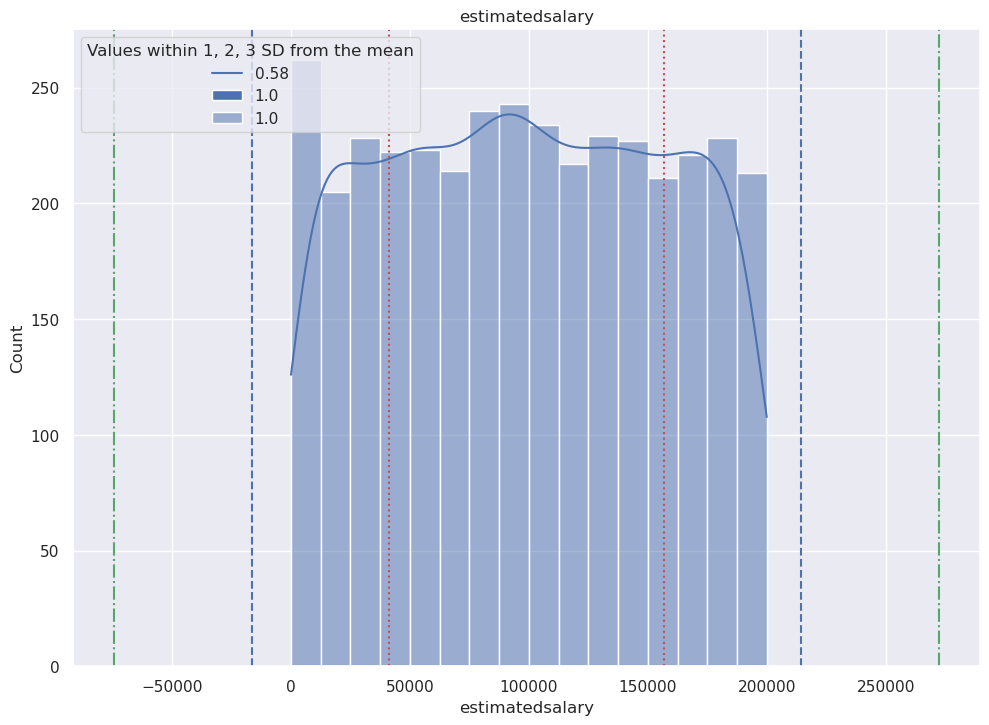

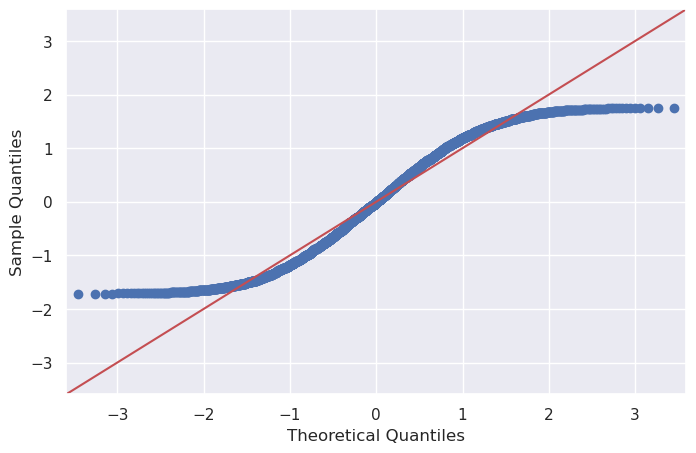

In [32]:
## Distributions of the group that the balance is equal than zero.
for j in nums: eda.distribution(posOut, j)

Consider the implications of your data and the resultant model. 

In this model we will not include the gender column. This data feature raises a set of complex issues, technically, culturally, and ethically. 

Note and recognize that 'the way' would be to model both with and without this feature and examine how it influences predictions.

Whatever the approach, it should be driven by an aim for equitable outcomes and for your particular use case.

---

 This is the process of taking two or more features and using them to create a brand new feature that will make the model more accurate. Normally, feature extraction is done using statistics to analyze how predictive each variable is and whether the new feature that is extracted is more predictive than the original variables on their own



In [33]:
## tenure and the customer's age is that it represents 
## the percentage of a person's life that they've been customers of the bank
df['loyalty'] = df['tenure'] / df['age']

In [34]:
df['loyalty'].describe()

count    10000.000000
mean         0.137936
std          0.089506
min          0.000000
25%          0.064516
50%          0.129032
75%          0.200000
max          0.555556
Name: loyalty, dtype: float64

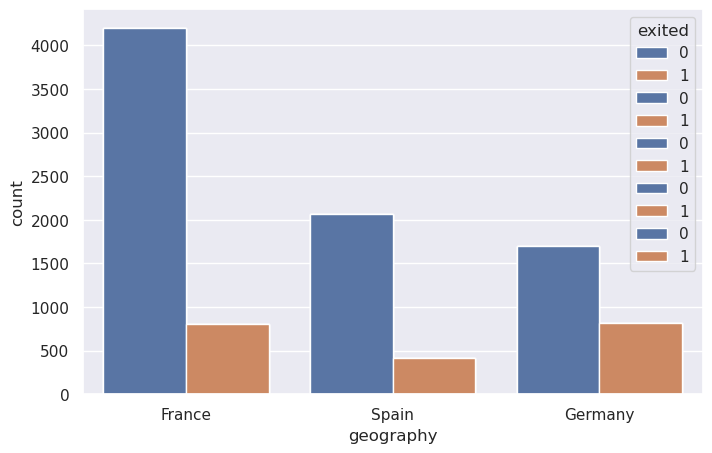

In [35]:
## categorical data
for i in cats:
    sns.countplot(data=df, x='geography', hue='exited')

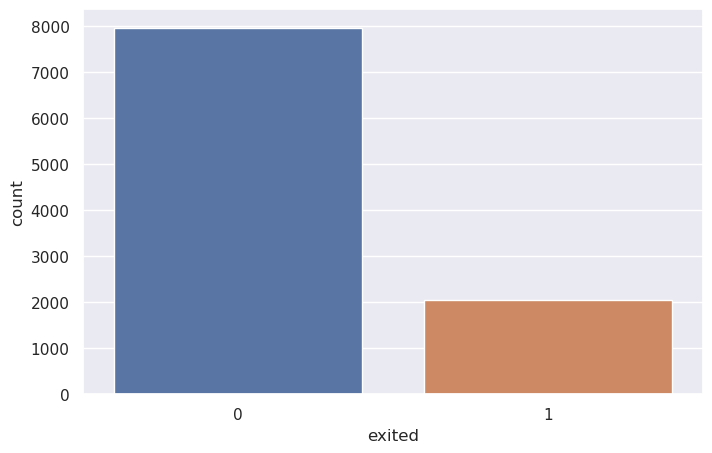

In [36]:
## All day, pretty 
sns.countplot(data=df, x='exited');

In [37]:
## upsampling the minority class as a whole df 
df2 = eda.upsample_minority_class(df, 'exited')

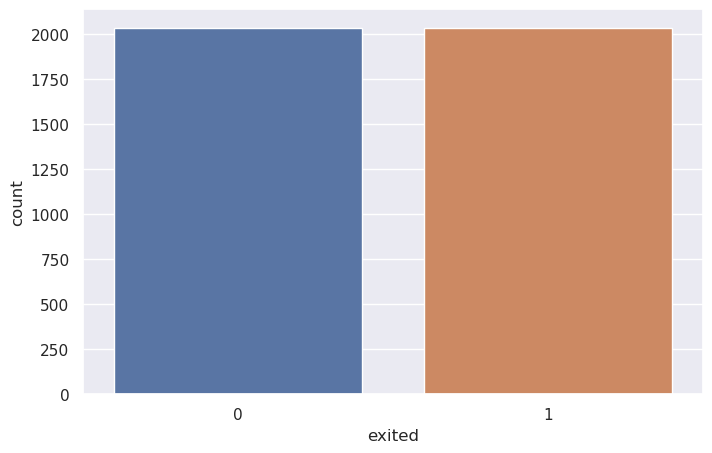

In [38]:
## All day df2 upsampled
sns.countplot(data=df2, x='exited');

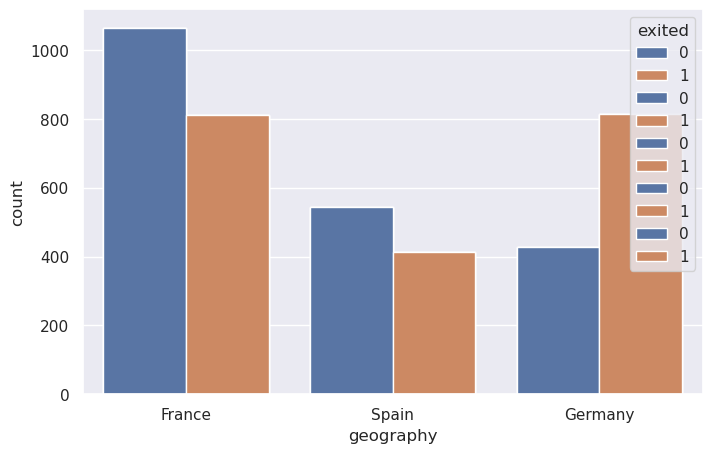

In [39]:
## categorical data
for i in cats:
    sns.countplot(data=df2, x='geography', hue='exited')

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      4074 non-null   int64  
 1   geography        4074 non-null   object 
 2   age              4074 non-null   int64  
 3   tenure           4074 non-null   int64  
 4   balance          4074 non-null   float64
 5   numofproducts    4074 non-null   int64  
 6   hascrcard        4074 non-null   int64  
 7   isactivemember   4074 non-null   int64  
 8   estimatedsalary  4074 non-null   float64
 9   exited           4074 non-null   int64  
 10  loyalty          4074 non-null   float64
dtypes: float64(3), int64(7), object(1)
memory usage: 350.2+ KB


In [41]:
df3 = pd.get_dummies(df2, drop_first=True) 

In [42]:
##
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   creditscore        4074 non-null   int64  
 1   age                4074 non-null   int64  
 2   tenure             4074 non-null   int64  
 3   balance            4074 non-null   float64
 4   numofproducts      4074 non-null   int64  
 5   hascrcard          4074 non-null   int64  
 6   isactivemember     4074 non-null   int64  
 7   estimatedsalary    4074 non-null   float64
 8   exited             4074 non-null   int64  
 9   loyalty            4074 non-null   float64
 10  geography_Germany  4074 non-null   uint8  
 11  geography_Spain    4074 non-null   uint8  
dtypes: float64(3), int64(7), uint8(2)
memory usage: 326.4 KB


In [43]:
## maybe upsampling by location has a better result
## Upsampling by geographical location
df_or = df.copy()
dfger = df[df['geography'] == 'Germany']
dfesp = df[df['geography'] == 'Spain']
dffra = df[df['geography'] == 'France']

In [44]:
## upsampling the minority class as a germany df 
dfupGer = eda.upsample_minority_class(dfger, 'exited')
## upsampling the minority class as a spain df 
dfupEsp = eda.upsample_minority_class(dfesp, 'exited')
## upsampling the minority class as a france df 
dfupFra = eda.upsample_minority_class(dffra, 'exited')

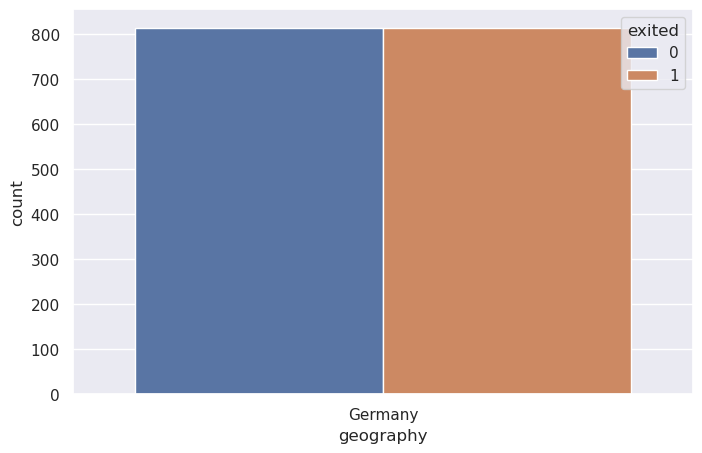

In [45]:
sns.countplot(data=dfupGer, x='geography', hue='exited');

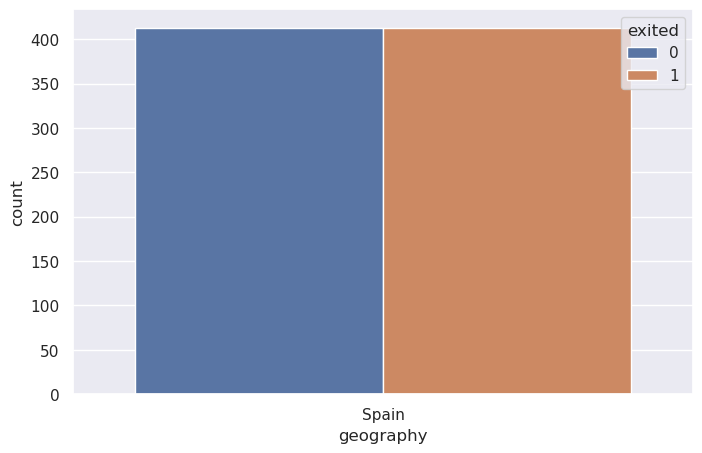

In [46]:
sns.countplot(data=dfupEsp, x='geography', hue='exited');

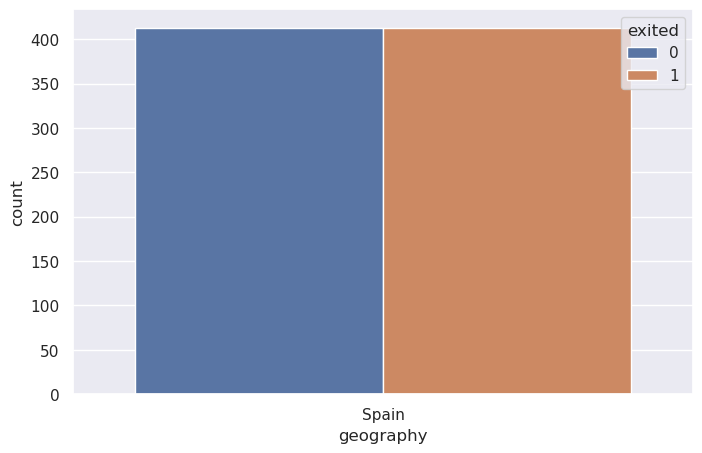

In [47]:
sns.countplot(data=dfupEsp, x='geography', hue='exited');

In [48]:
final = pd.concat([dfupGer, dfupEsp, dfupFra], ignore_index=True).sample(frac=1).reset_index()

In [49]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            4074 non-null   int64  
 1   creditscore      4074 non-null   int64  
 2   geography        4074 non-null   object 
 3   age              4074 non-null   int64  
 4   tenure           4074 non-null   int64  
 5   balance          4074 non-null   float64
 6   numofproducts    4074 non-null   int64  
 7   hascrcard        4074 non-null   int64  
 8   isactivemember   4074 non-null   int64  
 9   estimatedsalary  4074 non-null   float64
 10  exited           4074 non-null   int64  
 11  loyalty          4074 non-null   float64
dtypes: float64(3), int64(8), object(1)
memory usage: 382.1+ KB


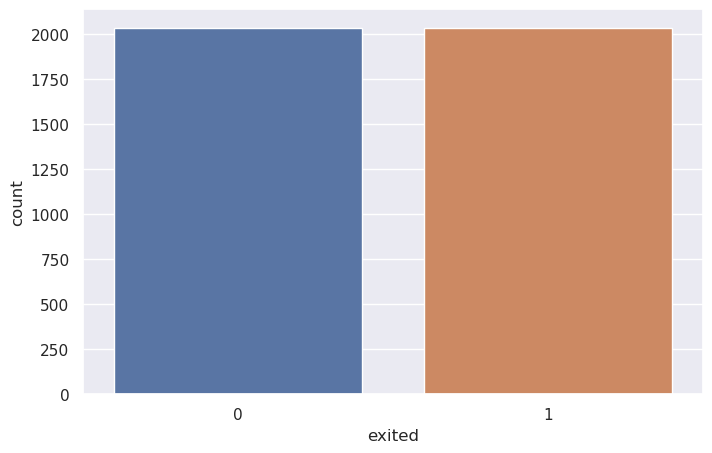

In [50]:
sns.countplot(data=final, x='exited');

In [59]:
## columns by data type finner grain.
nums = ['creditscore', 'balance', 'age', 'estimatedsalary']
cats = ['geography', 'tenure', 'numofproducts', 'hascrcard',
       'isactivemember']
target = ['exited']
final.columns

Index(['index', 'creditscore', 'geography', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
       'exited', 'loyalty'],
      dtype='object')

In [60]:
pair = ['creditscore', 'geography', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
       'exited', 'loyalty']

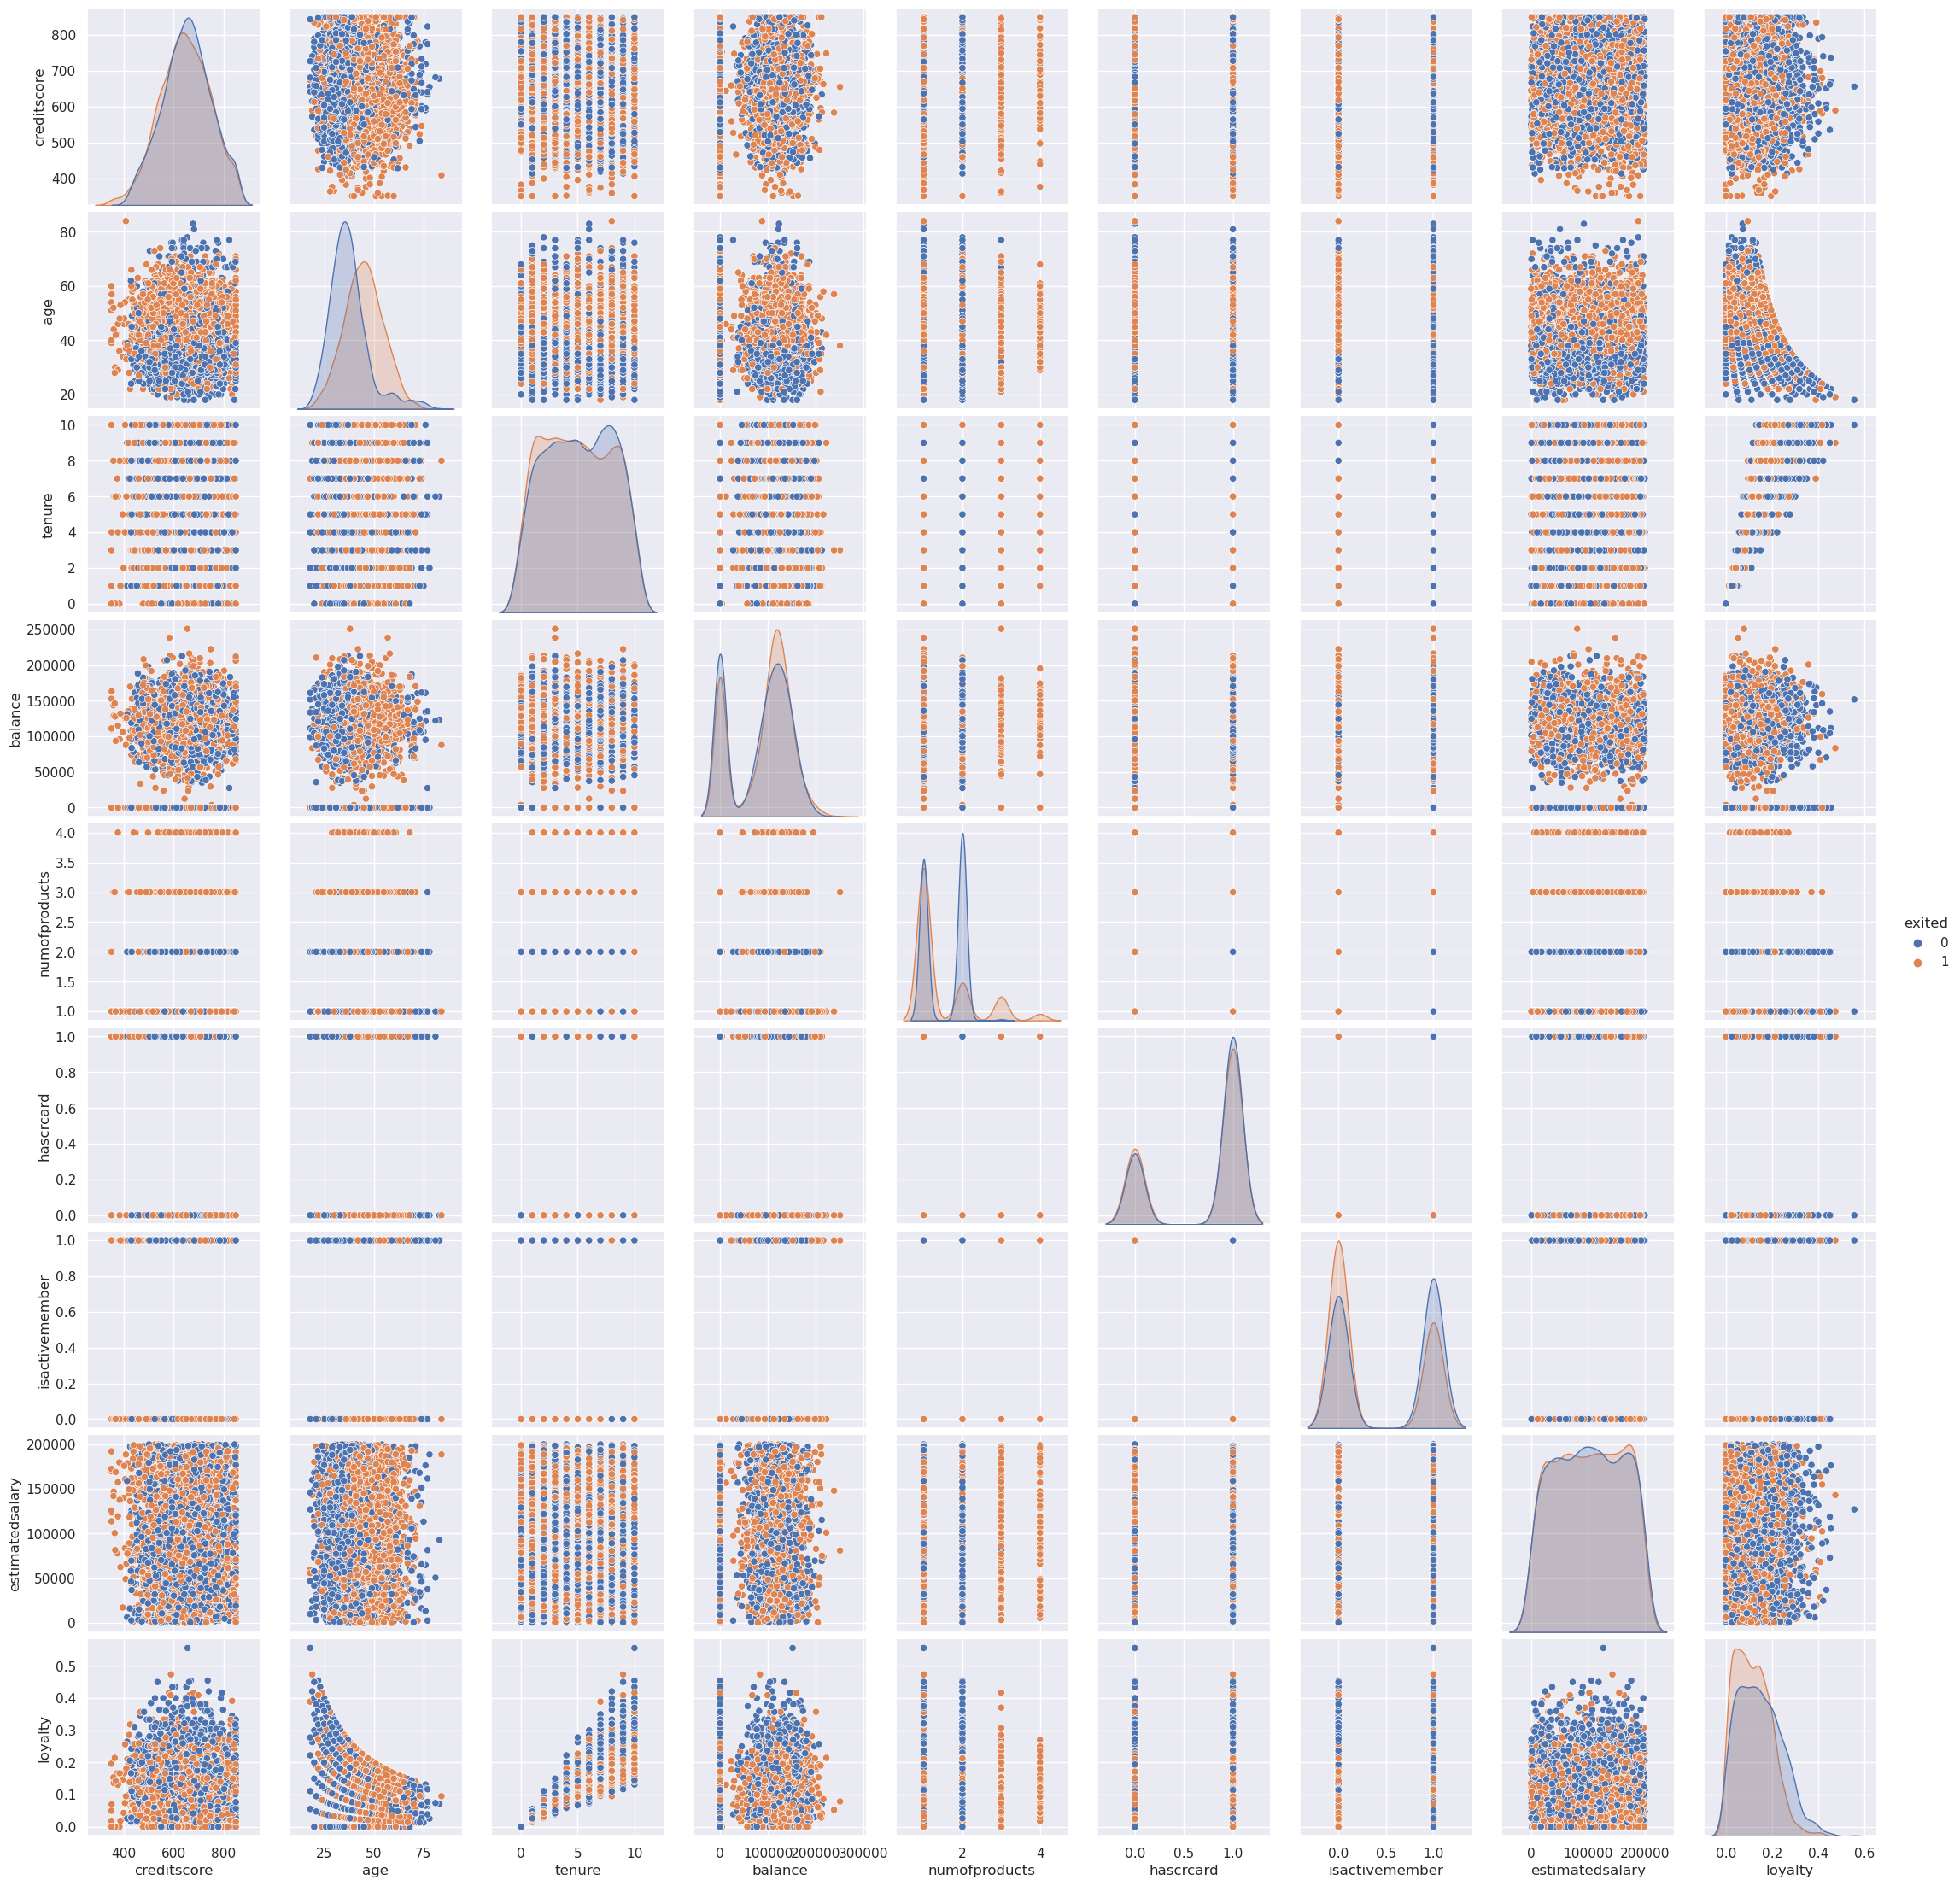

In [63]:
## 
sns.pairplot(final[pair], hue='exited');

In [51]:
## seems there is no difference 